# Exploring PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
gen = pd.read_csv("gen_mean_step_diff.csv")

In [3]:
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111297 entries, 0 to 7111296
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Time                             object 
 1   AnimalID                         int64  
 2   Step                             int64  
 3   dt                               object 
 4   key                              object 
 5   estrus                           int64  
 6   step_diff                        float64
 7   step_diff_hr                     float64
 8   step_diff_one_half               float64
 9   step_diff_3hr                    float64
 10  step_diff_6hr                    float64
 11  step_diff_12hr                   float64
 12  step_diff_30min                  float64
 13  minute                           int64  
 14  hour                             int64  
 15  month                            int64  
 16  step_diff_30min_mean_by_cow      float64
 17  step_dif

In [4]:
X = gen.loc[:, ~gen.columns.isin(['Time', 'AnimalID', 'dt', 'key', 'estrus'])]

In [5]:
X.head()

,Step,step_diff,step_diff_hr,step_diff_one_half,step_diff_3hr,step_diff_6hr,step_diff_12hr,step_diff_30min,minute,hour,...,step_diff_one_half_mean_by_cow,step_diff_3hr_mean_by_cow,step_diff_6hr_mean_by_cow,step_diff_12hr_mean_by_cow,step_diff_30min_mean_overall,step_diff_hr_mean_overall,step_diff_one_half_mean_overall,step_diff_3hr_mean_overall,step_diff_6hr_mean_overall,step_diff_12hr_mean_overall
0,25972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,3,...,452.817697,693.016896,1301.377056,2458.957314,96.742958,217.879726,337.088484,650.995148,1330.008089,2708.946955
1,25980,8.0,NaN,NaN,NaN,NaN,NaN,NaN,28,3,...,452.817697,693.016896,1301.377056,2458.957314,96.742958,217.879726,337.088484,650.995148,1330.008089,2708.946955
2,25980,0.0,NaN,NaN,NaN,NaN,NaN,8.0,58,3,...,452.817697,693.016896,1301.377056,2458.957314,96.742958,217.879726,337.088484,650.995148,1330.008089,2708.946955
3,25980,0.0,NaN,NaN,NaN,NaN,NaN,0.0,13,4,...,713.381768,1802.338820,3462.056927,5530.768861,97.005921,213.579753,328.236712,665.264504,1314.463240,2671.107295
4,25980,0.0,8.0,NaN,NaN,NaN,NaN,0.0,28,4,...,713.381768,1802.338820,3462.056927,5530.768861,97.005921,213.579753,328.236712,665.264504,1314.463240,2671.107295


In [7]:
pd.set_option("mode.chained_assignment", None)

In [8]:
X["step_diff"].fillna(0,inplace=True)
X["step_diff_30min"].fillna(0,inplace=True)
X["step_diff_hr"].fillna(0,inplace=True)
X["step_diff_one_half"].fillna(0,inplace=True)
X["step_diff_3hr"].fillna(0,inplace=True)
X["step_diff_6hr"].fillna(0,inplace=True)
X["step_diff_12hr"].fillna(0,inplace=True)

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
pca = PCA()
X_pca = pca.fit_transform(X)

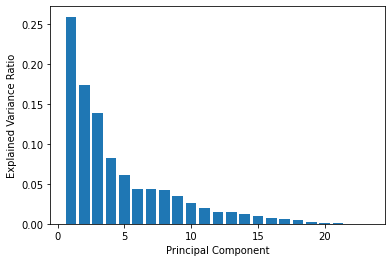

In [11]:
plt.bar(range(1, 24), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

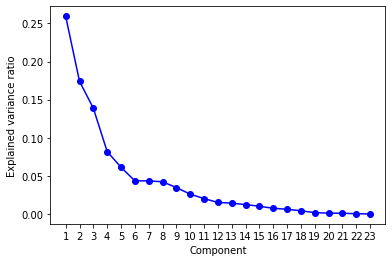

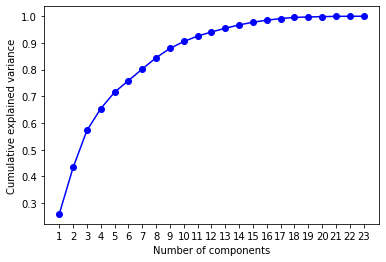

In [12]:
# Create scree plot
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.show()

# Create cumulative explained variance plot
plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()